## Steps
1. Input the data
2. Understand the fetures
3. Clean data
4. Scale data
5. Covariance matrix
6. Eigen values
7. Eigen vectors
8. Principal component selection
9. PCA scores
10. Conclusion

In [15]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

In [5]:
DBO = pd.read_excel('Employee_DataSet.xlsx')
DBO

,Name,City,Grade,Workload,Availability,AvgTime,Delivery,ClientSatis,FTNR,Automation,CrossTrain
0,A,Bangalore,Consultant,19.0,90,7.5,100,4.5,2,5,1
1,B,Mumbai,Manager,16.5,76,8.2,80,3.0,0,0,0
2,C,Bangalore,Consultant,15.0,78,9.0,110,4.0,4,2,2
3,D,Mumbai,Consultant,12.0,72,4.5,75,2.7,5,4,0
4,E,Bangalore,Manager,18.0,85,7.0,103,3.3,7,0,1
5,F,Mumbai,Consultant,14.0,82,8.2,80,4.2,1,3,0
6,G,Bangalore,Consultant,10.0,69,9.0,45,2.9,6,1,2
7,H,Pune,Consultant,17.0,78,7.0,65,4.5,4,1,0
8,I,Pune,Consultant,14.5,76,7.6,95,4.7,1,0,0
9,J,Bangalore,Consultant,11.0,74,6.0,60,2.0,8,0,1


In [6]:
# Remove text features
DB = DBO.drop(['Name', 'City', 'Grade'], axis=1)
DB

,Workload,Availability,AvgTime,Delivery,ClientSatis,FTNR,Automation,CrossTrain
0,19.0,90,7.5,100,4.5,2,5,1
1,16.5,76,8.2,80,3.0,0,0,0
2,15.0,78,9.0,110,4.0,4,2,2
3,12.0,72,4.5,75,2.7,5,4,0
4,18.0,85,7.0,103,3.3,7,0,1
5,14.0,82,8.2,80,4.2,1,3,0
6,10.0,69,9.0,45,2.9,6,1,2
7,17.0,78,7.0,65,4.5,4,1,0
8,14.5,76,7.6,95,4.7,1,0,0
9,11.0,74,6.0,60,2.0,8,0,1


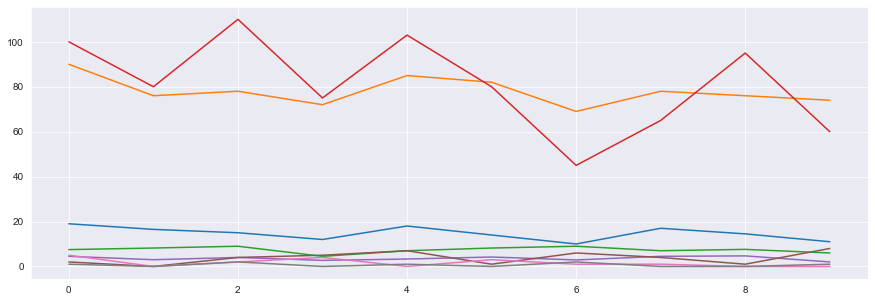

In [16]:
# prior to scaling
plt.figure(figsize=(15,5))
plt.plot(DB)
plt.show()

In [8]:
# Scale data
from sklearn.preprocessing import StandardScaler

DBS = StandardScaler().fit_transform(DB)
DBS

array([[ 1.50530109,  2.02837021,  0.07638263,  0.94544579,  1.05144574,
        -0.69230769,  1.95003374,  0.38411064],
       [ 0.63012604, -0.3380617 ,  0.61106102, -0.06572618, -0.66286797,
        -1.46153846, -0.91766294, -0.89625816],
       [ 0.10502101,  0.        ,  1.22212203,  1.45103178,  0.48000784,
         0.07692308,  0.22941573,  1.66447944],
       [-0.94518906, -1.01418511, -2.21509618, -0.31851917, -1.00573071,
         0.46153846,  1.3764944 , -0.89625816],
       [ 1.15523107,  1.18321596, -0.30553051,  1.09712159, -0.32000522,
         1.23076923, -0.91766294,  0.38411064],
       [-0.24504901,  0.6761234 ,  0.61106102, -0.06572618,  0.708583  ,
        -1.07692308,  0.80295507, -0.89625816],
       [-1.6453291 , -1.52127766,  1.22212203, -1.83527712, -0.77715555,
         0.84615385, -0.3441236 ,  1.66447944],
       [ 0.80516105,  0.        , -0.30553051, -0.82410515,  1.05144574,
         0.07692308, -0.3441236 , -0.89625816],
       [-0.070014  , -0.3380617 

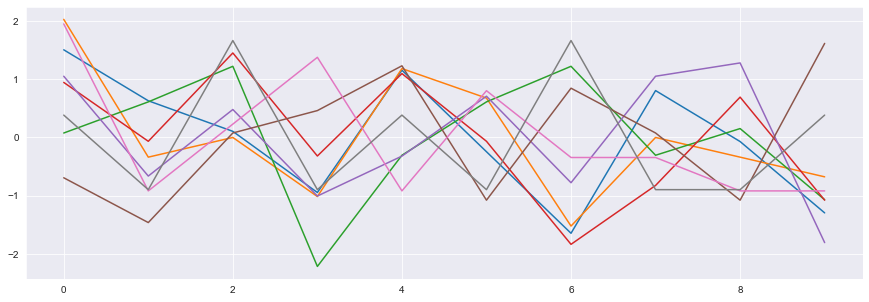

In [17]:
plt.figure(figsize=(15,5))
plt.plot(DBS)
plt.show()

In [10]:
cv = np.cov(DBS.T)
print(f"Covariance Matrix:\n\n {cv}")

Covariance Matrix:

 [[ 1.11111111  0.93361266  0.14855149  0.75791264  0.66636639 -0.45030374
   0.15169963 -0.2440302 ]
 [ 0.93361266  1.11111111  0.11763374  0.75584294  0.60530131 -0.29616517
   0.42009865 -0.07214061]
 [ 0.14855149  0.11763374  1.11111111  0.15575921  0.43065956 -0.42108371
  -0.209307    0.51072254]
 [ 0.75791264  0.75584294  0.15575921  1.11111111  0.56087254 -0.36384906
   0.22295736  0.02805125]
 [ 0.66636639  0.60530131  0.43065956  0.56087254  1.11111111 -0.69060957
   0.29278295 -0.23738019]
 [-0.45030374 -0.29616517 -0.42108371 -0.36384906 -0.69060957  1.11111111
  -0.24020023  0.5690528 ]
 [ 0.15169963  0.42009865 -0.209307    0.22295736  0.29278295 -0.24020023
   1.11111111 -0.01631871]
 [-0.2440302  -0.07214061  0.51072254  0.02805125 -0.23738019  0.5690528
  -0.01631871  1.11111111]]


In [11]:
eig_vals, eig_vecs = np.linalg.eig(cv)

print(f"\n Eigen Values: \n {eig_vals}")
print(f"\n Eigen Vectors:  {eig_vecs}")


 Eigen Values: 
 [3.85494431 1.69972822 1.4179106  1.01203489 0.02106914 0.12225882
 0.42545138 0.33549152]

 Eigen Vectors:  [[-0.46607329 -0.01330507 -0.14599342 -0.35962006  0.10446962 -0.69829365
  -0.29272343 -0.21850187]
 [-0.45008307  0.02335407 -0.36286422 -0.11158116 -0.21298713  0.63660624
  -0.35997147 -0.26934833]
 [-0.15311175  0.66253772  0.39761003  0.13616052  0.52478621  0.13337501
  -0.10494786 -0.23825118]
 [-0.41474627  0.1185672  -0.26533796 -0.21281504  0.18828168  0.08856885
   0.79610715  0.14543677]
 [-0.44472987  0.06476016  0.22885262  0.15058972 -0.10862666  0.00518449
  -0.24699144  0.80631215]
 [ 0.3607051   0.13196221 -0.55834777 -0.22718865  0.51794092  0.0670261
  -0.27680492  0.37381095]
 [-0.19653512 -0.21822898 -0.35874436  0.82631605  0.26515517 -0.14423071
   0.00404373 -0.10549036]
 [ 0.13499762  0.69067457 -0.35453383  0.19313975 -0.53150937 -0.23698789
   0.0478623   0.02812132]]


In [12]:
# Calculating Scores

def zerolistmaker(n):
    listofzeros = [0]*n
    return listofzeros


b = zerolistmaker(len(eig_vals))
b1 = zerolistmaker(len(eig_vals))
b2 = zerolistmaker(len(eig_vals))
b3 = zerolistmaker(len(eig_vals))

EV1 = eig_vecs[:,0]
for i in range(0, len(eig_vals)):
    b1[i] = EV1[i]*(math.sqrt(eig_vals[i]))

EV2 = eig_vecs[:,1]
for i in range(0, len(eig_vals)):
    b2[i] = EV2[i]*(math.sqrt(eig_vals[i]))

EV3 = eig_vecs[:,2]
for i in range(0, len(eig_vals)):
    b3[i] = EV3[i]*(math.sqrt(eig_vals[i]))

for i in range (0, len(eig_vals)):
    b[i] = b1[i] + b2[i] + b3[i]

# print(f"PCA Loading: {b}")

z = np.array(b)
# print(z.T)

DBO['Scores'] = abs(np.dot(DB, z.T))
DBO

,Name,City,Grade,Workload,Availability,AvgTime,Delivery,ClientSatis,FTNR,Automation,CrossTrain,Scores
0,A,Bangalore,Consultant,19.0,90,7.5,100,4.5,2,5,1,166.759705
1,B,Mumbai,Manager,16.5,76,8.2,80,3.0,0,0,0,134.895797
2,C,Bangalore,Consultant,15.0,78,9.0,110,4.0,4,2,2,151.772463
3,D,Mumbai,Consultant,12.0,72,4.5,75,2.7,5,4,0,128.550945
4,E,Bangalore,Manager,18.0,85,7.0,103,3.3,7,0,1,160.185269
5,F,Mumbai,Consultant,14.0,82,8.2,80,4.2,1,3,0,139.565573
6,G,Bangalore,Consultant,10.0,69,9.0,45,2.9,6,1,2,99.168082
7,H,Pune,Consultant,17.0,78,7.0,65,4.5,4,1,0,131.020653
8,I,Pune,Consultant,14.5,76,7.6,95,4.7,1,0,0,141.621665
9,J,Bangalore,Consultant,11.0,74,6.0,60,2.0,8,0,1,117.051067


In [13]:
df_sorted = DBO.sort_values(by=['Scores'], ascending=False)
df_sorted

,Name,City,Grade,Workload,Availability,AvgTime,Delivery,ClientSatis,FTNR,Automation,CrossTrain,Scores
0,A,Bangalore,Consultant,19.0,90,7.5,100,4.5,2,5,1,166.759705
4,E,Bangalore,Manager,18.0,85,7.0,103,3.3,7,0,1,160.185269
2,C,Bangalore,Consultant,15.0,78,9.0,110,4.0,4,2,2,151.772463
8,I,Pune,Consultant,14.5,76,7.6,95,4.7,1,0,0,141.621665
5,F,Mumbai,Consultant,14.0,82,8.2,80,4.2,1,3,0,139.565573
1,B,Mumbai,Manager,16.5,76,8.2,80,3.0,0,0,0,134.895797
7,H,Pune,Consultant,17.0,78,7.0,65,4.5,4,1,0,131.020653
3,D,Mumbai,Consultant,12.0,72,4.5,75,2.7,5,4,0,128.550945
9,J,Bangalore,Consultant,11.0,74,6.0,60,2.0,8,0,1,117.051067
6,G,Bangalore,Consultant,10.0,69,9.0,45,2.9,6,1,2,99.168082


<BarContainer object of 10 artists>

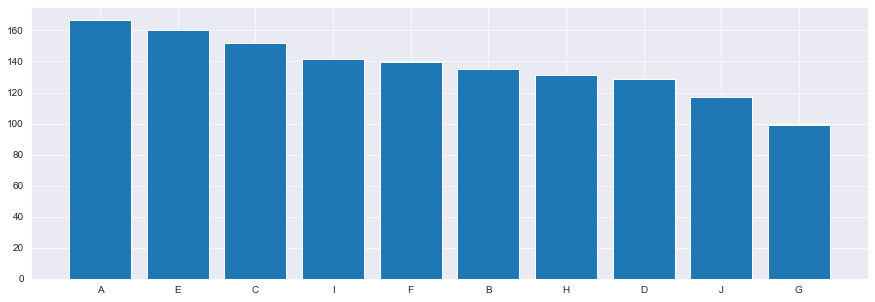

In [18]:
plt.figure(figsize=(15,5))
plt.bar(df_sorted['Name'], df_sorted['Scores'])

## PCA (Principal Component Analysis)

- is an unsupervised, non-parametric statistical technique primarily used for dimensionality reduction in machine learning.
- High dimensionality means that the dataset has a large number of features.
- The primary problem associated with high-dimensionality in the machine learning field is model overfitting.
- PCA makes maximum variability in the dataset more visible by rotating the axes. 



## Assumptions

1. Sample size: Minimum of 150 observations and ideally a 5:1 ratio of observation to features.
2. Correlations: The feature set is correlated, so the reduced feature set effectively represents the original data space.
3. Linearity: All variables exhibit a constant multivariate normal relationship, and principal components are a linear combination of the original features.
4. Outliers: No significant outliers in the data as these can have a disproportionate influence on the results.
5. Large variance implies more structure: high variance axes are treated as principal components, while low variance axes are treated as noise and discarded.



## PCA Limitations

1. Model performance: PCA can lead to a reduction in model performance on datasets with no or low feature correlation or does not meet the assumptions of linearity.
2. Classification accuracy: Variance based PCA framework does not consider the differentiating characteristics of the classes. Also, the information that distinguishes one class from another might be in the low variance components and may be discarded.
3. Outliers: PCA is also affected by outliers, and normalization of the data needs to be an essential component of any workflow.
4. Interpretability: Each principal component is a combination of original features and does not allow for the individual feature importance to be recognized.



#### Points to Remember for PCA

1. PCA is used to overcome features redundancy in a data set.
2. These features are low dimensional in nature.
3. These features a.k.a components are a resultant of normalized linear combination of original predictor variables.
4. These components aim to capture as much information as possible with high explained variance.
5. The first component has the highest variance followed by second, third and so on.
6. The components must be uncorrelated (remember orthogonal direction ? ). See above.
7. Normalizing data becomes extremely important when the predictors are measured in different units.
8. PCA works best on data set having 3 or higher dimensions. Because, with higher dimensions, it becomes increasingly difficult to make interpretations from the resultant cloud of data.
9. PCA is applied on a data set with numeric variables.
10. PCA is a tool which helps to produce better visualizations of high dimensional data.

### Other points

- Keeps major variation (covariation)
- Use subset of major data.
- cov = A (3*2) * A (pwd T) (2*3)  Transpose because we need square matrix.
- A: Eigen Values: (Is variance captured by dimension ihat is nothing but standard deviation)
- A(pwd T): Eigen vectors: Are left out points , when other axis are removed.
- Adding all eigen values it should be equal to number of features/columns.


- Note: Before PCA, Scale the dataset.
